# Clustering Using Python

# 1) K- Means Clustering 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\Sukanya\Desktop\DATA\Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = data.iloc[:, [3 , 4]].values

### Elbow Method to determine the number of clusters required

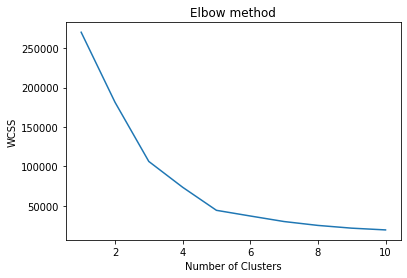

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show();

Elbow point is clearly visisble at 5th position thus we will consider 5 clusters as optimal numbar of clusters for our analysis

In [5]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

### Visualizing the clusters to derive conclusions based on them

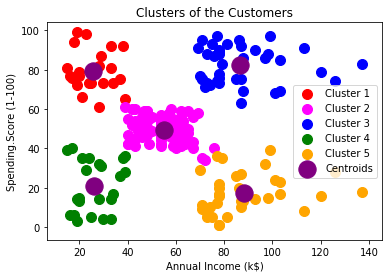

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s= 100, c = 'magenta', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s= 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s= 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s= 100, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 300, c = 'purple', label = 'Centroids')
plt.title("Clusters of the Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending.Score (1-100)")
plt.legend()
plt.show();

- Cluster_1 reperesents the customers having low income and high expenditure.
- Cluster_2 reperesents the customers having medival income and expenditure.
- Cluster_3 reperesents the customers having high income and high expenditure.
- Cluster_4 reperesents the customers having low income and low expenditure.
- Cluster_5 reperesents the customers having low income and low expenditure.

Thus from the above clusters we can conclude that **Cluster_3rd** can be targeted considering the High Annual income and high purchase habits.
Another cluster that can be targeted is **Cluster_5th** which has high annual income but low purchase score.

# 2) Hierarchical Clustering

### Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [8]:
data = pd.read_csv(r"C:\Users\Sukanya\Desktop\DATA\Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
X = data.iloc[:, [3,4]].values

### Using Dendrogram to find optimal number of clusters

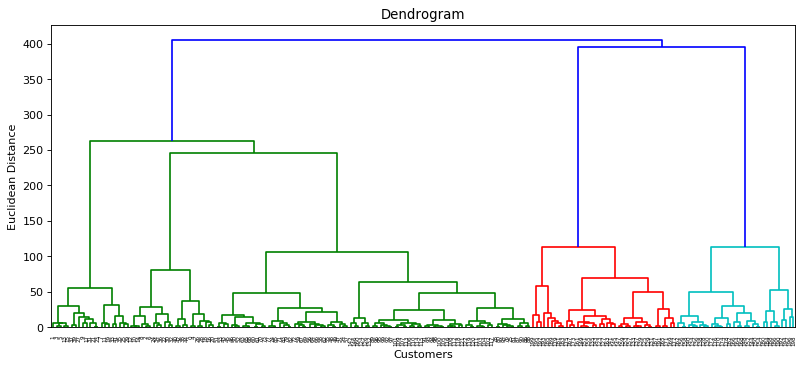

In [10]:
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch .linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show();

Here from above diagram we can conclude that 5 will be the optimal number of clusters for our analysis.

## Training Hierarchical Clustering Model on training Dataset

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


### Visualizing the Clusters

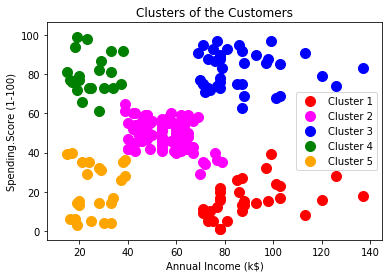

In [12]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s= 100, c = 'magenta', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s= 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s= 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s= 100, c = 'orange', label = 'Cluster 5')
plt.title("Clusters of the Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending.Score (1-100)")
plt.legend()
plt.show();

- Cluster_1 reperesents the customers having low income and high expenditure.
- Cluster_2 reperesents the customers having medival income and expenditure.
- Cluster_3 reperesents the customers having high income and high expenditure.
- Cluster_4 reperesents the customers having low income and low expenditure.
- Cluster_5 reperesents the customers having low income and low expenditure.

Thus from the above clusters we can conclude that **Cluster_3rd** can be targeted considering the High Annual income and high purchase habits.
Another cluster that can be targeted is **Cluster_5th** which has high annual income but low purchase score.

## Reducing the number of clusters to 3

In [13]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


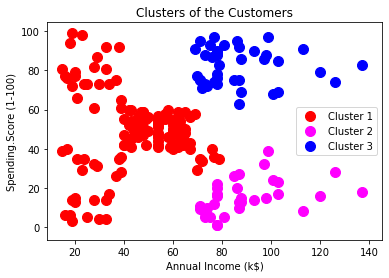

In [14]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s= 100, c = 'magenta', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s= 100, c = 'blue', label = 'Cluster 3')
plt.title("Clusters of the Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending.Score (1-100)")
plt.legend()
plt.show();

Here we can see that reducing the number clusters merged the clusters of people with low income and high purchase and low income and low purchase with the cluster of people with medival income and medival purchase scores.

Thus from the above clusters we can conclude that **Cluster_3rd** can be targeted considering the High Annual income and high purchase habits.
Another cluster that can be targeted is **Cluster_2nd** which has high annual income but low purchase score.